In [13]:
import csv
import pandas as pd
import matplotlib.pyplot as plt;

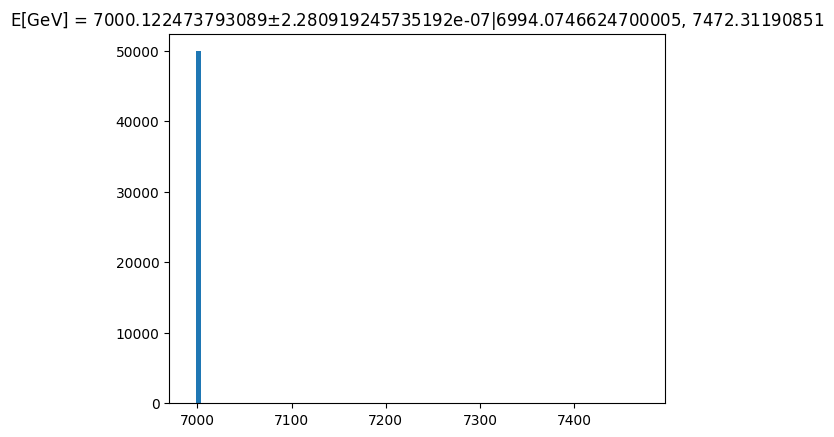

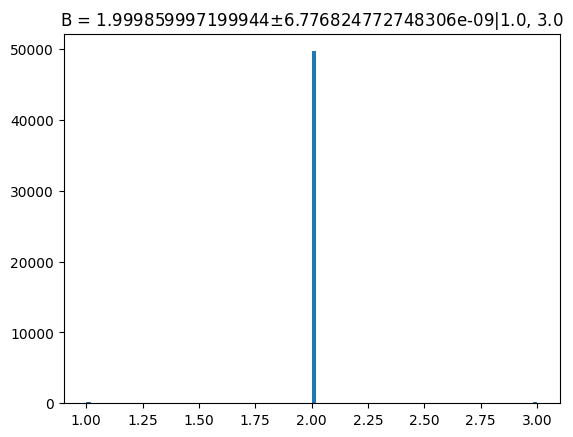

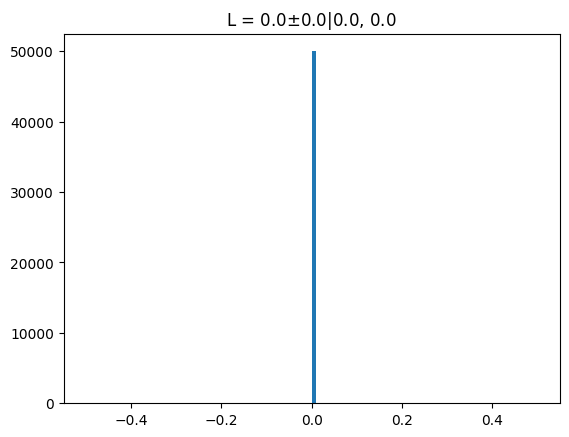

49999


In [21]:
with open('phsd.csv.statistics', newline='\n') as csvfile:
    reader = csv.reader(csvfile, delimiter=';', quotechar='|')
    data = list(map(
        lambda x: list(map(lambda y: y.strip(), x[1])) if (x[0] == 0) else list(map(float, x[1])),
        enumerate(reader)
    ))
    df = pd.DataFrame(data[1:], columns=data[0])

    for i in df:
        
        plt.hist(df[i], bins=100)
        mid = sum(df[i]) / len(df[i])
        sigma = (sum((df[i] - mid)**2))**(0.5) / (len(df[i]) * (len(df[i]) - 1))
        plt.title(i + f" = {mid}$\pm${sigma}|{min(df[i])}, {max(df[i])}")
        plt.show()
    print(len(df))